In [11]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)
library(clustree)

Warning message:
"package 'clustree' was built under R version 4.0.3"
Loading required package: ggraph

Warning message:
"package 'ggraph' was built under R version 4.0.3"

Attaching package: 'ggraph'


The following object is masked from 'package:sp':

    geometry




In [13]:
df.water.access <- read_excel("../../results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
head(dfsimple)
#dfsimple$clusters <- cutree(hc.ward2,4)
df.wa <- df.water.access[,c(1:18)]

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,3
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,1


   Country               phom            pipy            ptap      
 Length:73          Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.: 2.70   1st Qu.: 3.30   1st Qu.: 3.00  
 Mode  :character   Median : 8.30   Median : 6.60   Median :10.30  
                    Mean   :18.31   Mean   :11.59   Mean   :12.01  
                    3rd Qu.:25.40   3rd Qu.:19.70   3rd Qu.:17.70  
                    Max.   :90.60   Max.   :54.10   Max.   :57.70  
      bore            pwel             pspr             rain       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.60   1st Qu.: 1.500   1st Qu.: 0.100   1st Qu.: 0.000  
 Median : 5.70   Median : 4.100   Median : 0.800   Median : 0.300  
 Mean   :13.43   Mean   : 6.747   Mean   : 3.342   Mean   : 2.742  
 3rd Qu.:22.90   3rd Qu.: 9.000   3rd Qu.: 4.200   3rd Qu.: 1.700  
 Max.   :86.40   Max.   :48.100   Max.   :47.900   Max.   :46.700  
      uwel             uspr             truc    

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


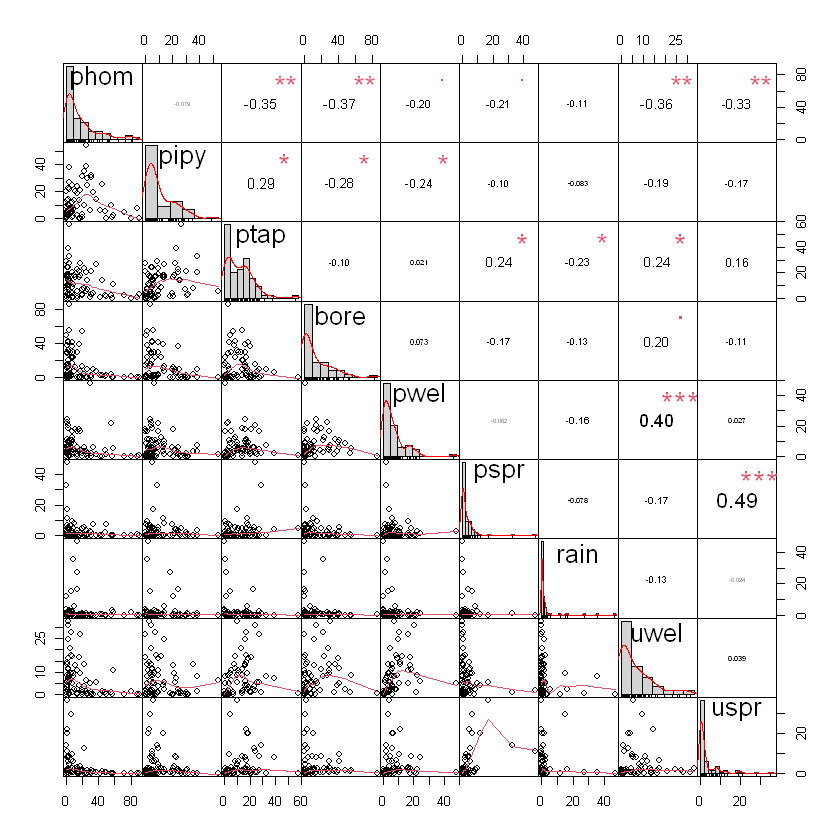

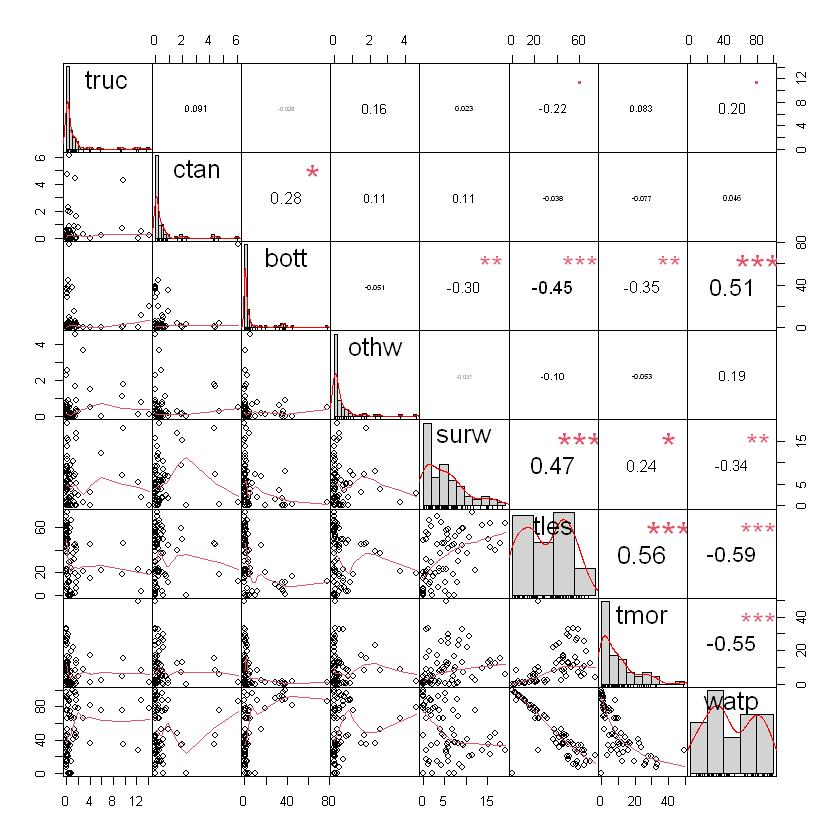

In [14]:
summary(df.wa)
head(df.wa)
chart.Correlation(df.wa[,2:10], histogram=TRUE, pch=19 , tl.cex = .7 )
chart.Correlation(df.wa[,11:18], histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [15]:
# Create data: Water Accessibility Aggregate
df.wa <- df.wa[,c(2:18)]
head(df.wa)
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:18]
df.wa.aggregate

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


clusters,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.542308,6.450000,12.7115385,29.869231,9.557692,1.303846,0.6115385,13.207692,2.6346154,1.330769,0.6269231,1.407692,0.2923077,6.111538,46.834615,14.4923077,37.27308
2,61.190909,4.027273,2.2818182,1.172727,7.436364,1.336364,0.6090909,1.709091,0.1909091,2.054545,0.2818182,14.000000,0.6454545,1.663636,6.145455,0.5727273,65.80909
3,19.309091,26.031818,17.2863636,4.036364,3.586364,2.231818,3.0454545,3.690909,2.1863636,1.481818,0.4090909,3.650000,0.7000000,5.222727,27.431818,6.7863636,60.03636
4,1.837500,5.775000,17.0250000,4.450000,7.500000,16.150000,2.4375000,5.625000,20.0375000,0.225000,0.4000000,0.525000,0.1125000,10.200000,59.837500,20.3250000,18.80000
5,9.033333,2.550000,0.7666667,11.100000,3.883333,2.850000,15.1833333,2.450000,0.8166667,2.366667,1.3833333,35.866667,0.2666667,1.983333,7.700000,1.9000000,73.41667


# Extract table of cluster centroids.

[1] 72.44542 91.67310 76.59311 74.63342 85.13608

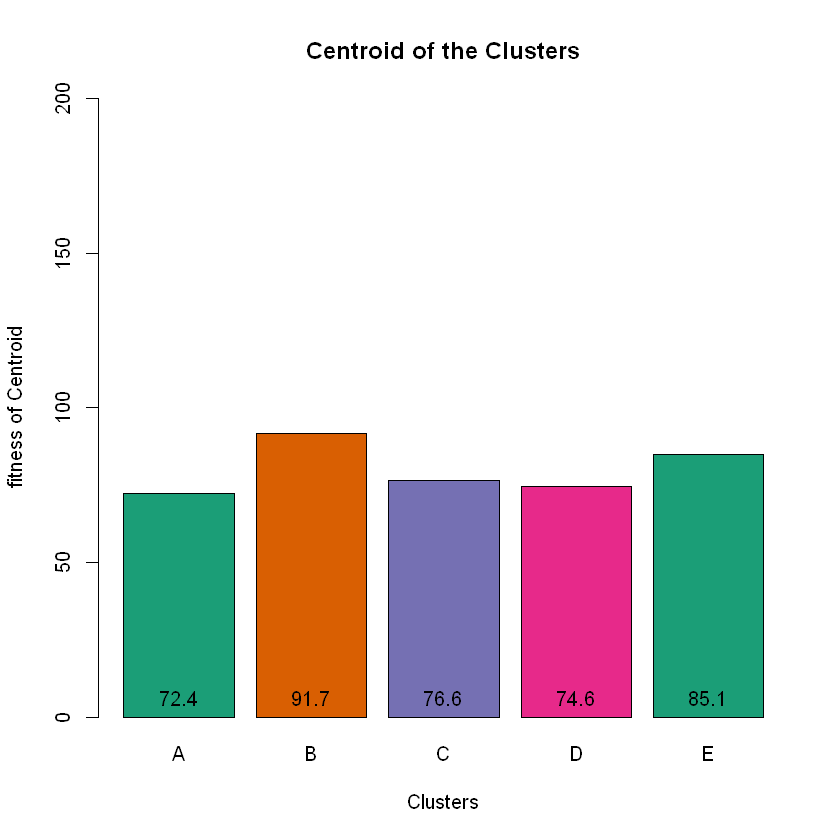

[1]  73.72822  97.55788  66.41446 131.88180  89.49631 117.14064

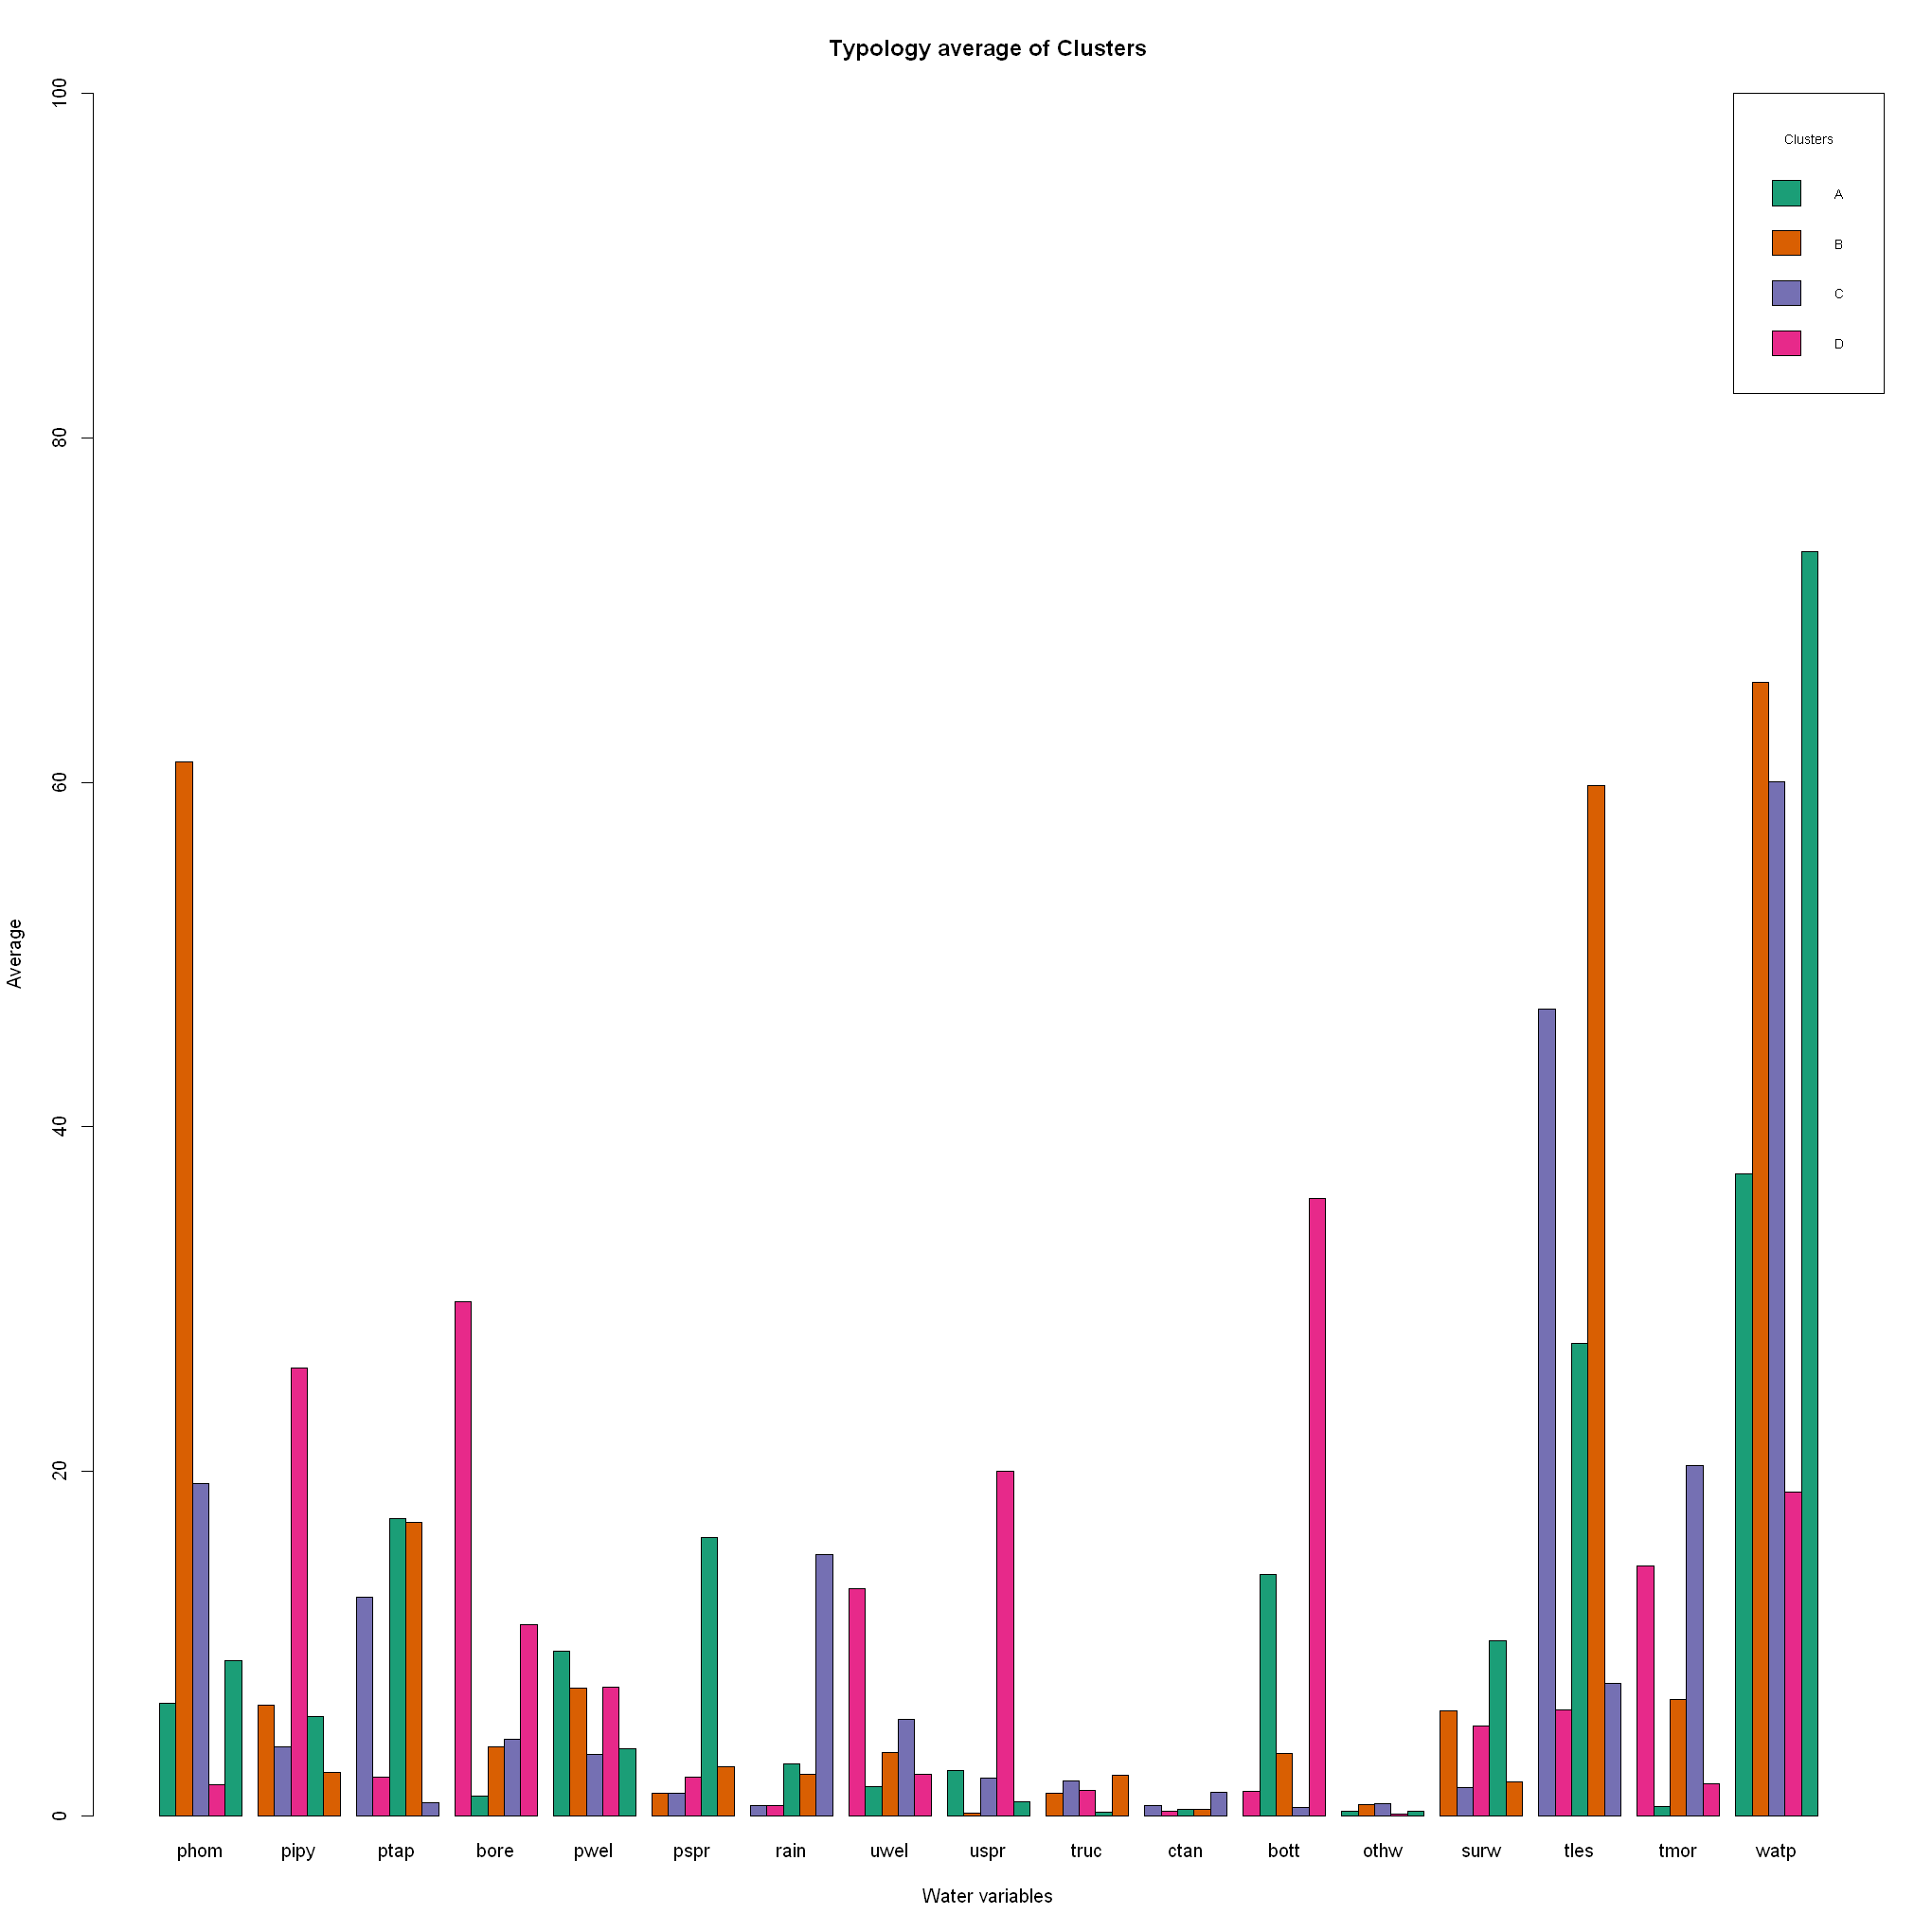

In [17]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"),
        ylim = c(0, 200), names.arg = c("A", "B", "C","D","E"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(df.wa.aggregate[,c(2:18)]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"),
        legend = c("A", "B", "C","D"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 100))
                  


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [ ]:
centroiddf.wa
str(centroiddf.wa)

# Radar Plot for the aggregated data

In [ ]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
#max.aggregate = apply(df.wa.aggregate,2,max)
#apply(df.wa.aggregate,2,min)
#max.aggregate
#norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')

data.spider <- rbind(rep(100,50) , rep(0,10) , df.wa.aggregate[,c(2:18)])

head(data.spider,7)
colnames(data.spider) <- c(
                            
    "Piped Into Dwelling",
    'Piped Into Yard',
    "Public Tap" ,
    "Borehole" , 
     "Protected Well" ,
       "Protected Spring", 
    "Rainwater" ,
    
    "Unprotected Well Water", 
    "Unprotected Spring", 
    'Tanker Truck',
    'Cart With Tank',
    'Bottled Water',
    'Other Water Source',
    "Surface Water" ,
     "Water 30 minutes or < away round trip" , 
    "Water > 30 minutes away round trip" , 
    'Water on Premise')                       
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,100,25), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

In [ ]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:18]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  ,1:10]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




In [ ]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:18]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  , 11:17]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, scale = "width"  , size=.3, adjust = .75) + 
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Country's Centroids Rankings Demo

In [ ]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa 
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,4)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df4_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df4_clus_avg,7) 

sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df4_clus_avg, columns = c(2:18), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df.wa %>% gather(Measure, Ranking, ptap:watp) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 4 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 4 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"))
# set the set factor as for the clusters


# Rank Countries

In [ ]:
df = read_excel( "../../results/df-water-access.xlsx")
count(df)

In [ ]:
head(df,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

In [ ]:
df["norm"] <- apply(df[2:18], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [ ]:
df["distToCentroid"] = 0 # initialize

In [ ]:
df.wa$clusters <- as.numeric(df.wa$clusters)
head(df.wa)
#Turn into numeric to find centroids

In [ ]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:18]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df,7)

In [ ]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/dfcluster-rank.xlsx')

In [ ]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 20, 21)

In [ ]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

In [ ]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

In [ ]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

In [ ]:
#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

In [ ]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 20, 21)



In [ ]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

In [ ]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)

# World Map

In [ ]:
df = read_excel('../../results/dfcluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

In [ ]:
df = df[, c(1,21)] # select only country name and cluster number
head(df)

In [ ]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

In [ ]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

In [ ]:
setdiff(df$region,coords$name)

In [ ]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [ ]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [ ]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [ ]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

In [ ]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/